# Importing English sarcasm dataset

In [1]:
# Importing packages, libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.util import ngrams

In [2]:
# Enlgish sarcasm data
ES_data = pd.read_csv('sarcasm.csv')
ES_data.head()

,Tweet,Reverse,label
0,I love finding out who your true friends are. ...,(: best. the just seriously It's are. friends ...,0
1,USER :/ bye,bye :/ USER,0
2,USER I absolutely love Kanye's voice USER,USER voice Kanye's love absolutely I USER,0
3,We're hiring a new Kiosk Supervisor! Think you...,"Noon! at 7th, September is Deadline URL apply!...",0
4,Every time I see Dave Grohl with his long hipp...,heroin. on back he's if wonder I haircut hippy...,0


# Data Cleaning - Removing Missing Data

In [3]:
# Check for NaN/missing values in the training data
missing_data = ES_data.isnull()
missing_data= ES_data[ES_data.isnull().any(axis=1)]
missing_data.head()

,Tweet,Reverse,label


In [4]:
# Check the number of datapoints with missing values
print('The number of datapoints with missing values is:',len(missing_data))

The number of datapoints with missing values is: 0


In [5]:
# Remove rows with missing data
ES_data = pd.concat([ES_data, missing_data, missing_data]).drop_duplicates(keep=False)
ES_data

,Tweet,Reverse,label
0,I love finding out who your true friends are. ...,(: best. the just seriously It's are. friends ...,0
1,USER :/ bye,bye :/ USER,0
2,USER I absolutely love Kanye's voice USER,USER voice Kanye's love absolutely I USER,0
3,We're hiring a new Kiosk Supervisor! Think you...,"Noon! at 7th, September is Deadline URL apply!...",0
4,Every time I see Dave Grohl with his long hipp...,heroin. on back he's if wonder I haircut hippy...,0
...,...,...,...
1795,i just love having unlimited texting with nobo...,text to nobody with texting unlimited having l...,1
1796,just love getting free condoms at school #day ...,{number} #day school at condoms free getting l...,1
1797,i love hitting red lights when u need to be so...,somewhere be to need u when lights red hitting...,1
1798,i love being sick when its a {number} day weekend,weekend day {number} a its when sick being love i,1


# Exploratory Data Analysis

## Checking Class Distributions

In [8]:
# Check whether the data is balanced
print('The dataset is already balanced:')
ES_data['label'].value_counts()

The dataset is already balanced:


0    900
1    900
Name: label, dtype: int64

The dataset is already balanced.

## Analysis of average sarcastic and non-sarcastic tweet length

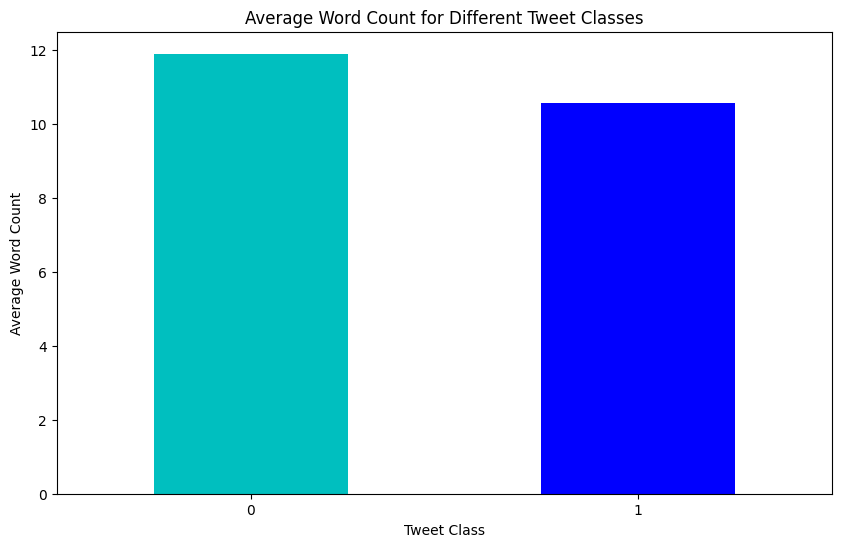

The average word count is:


label
0    11.903333
1    10.563333
Name: word_count, dtype: float64

In [12]:
# Create the word_count column
ES_data = ES_data.copy()
ES_data['word_count'] = ES_data['Tweet'].apply(lambda x: len(str(x).split()))

# Group by class and calculate the mean word count
mean_word_counts = ES_data.groupby('label')['word_count'].mean()

# Plot the graph
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color=['c', 'b'])
plt.title('Average Word Count for Different Tweet Classes')
plt.xlabel('Tweet Class')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

print('The average word count is:')
mean_word_counts

## Histograms of wordcount distributions by class

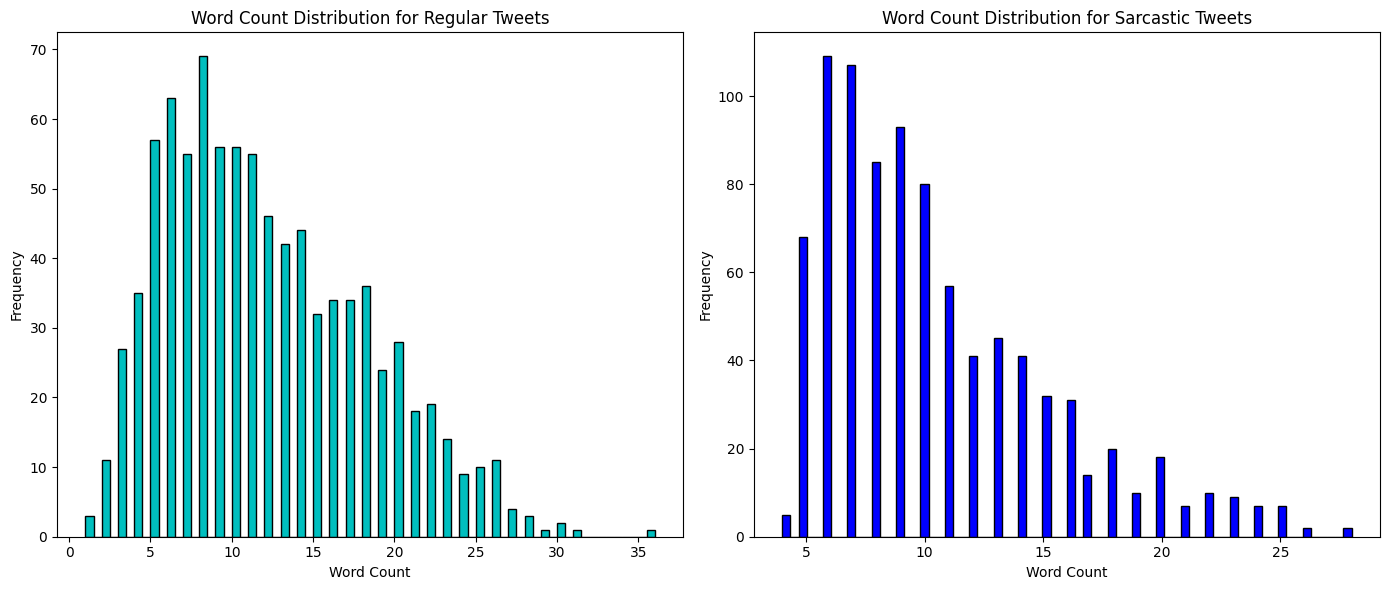

In [15]:
# Separate regular and sarcastic tweets
regular_tweets = ES_data[ES_data['label'] == 0]
sarcastic_tweets = ES_data[ES_data['label'] == 1]
plt.figure(figsize=(14,6))

# Plot histogram for regular tweets
plt.subplot(1, 2, 1)
plt.hist(regular_tweets['Tweet'].apply(lambda x: len(str(x).split())), bins=70, color='c', edgecolor='black')
plt.title('Word Count Distribution for Regular Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for sarcastic tweets
plt.subplot(1, 2, 2)
plt.hist(sarcastic_tweets['Tweet'].apply(lambda x: len(str(x).split())), bins=70, color='b', edgecolor='black')
plt.title('Word Count Distribution for Sarcastic Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Histogram of wordcount distribution

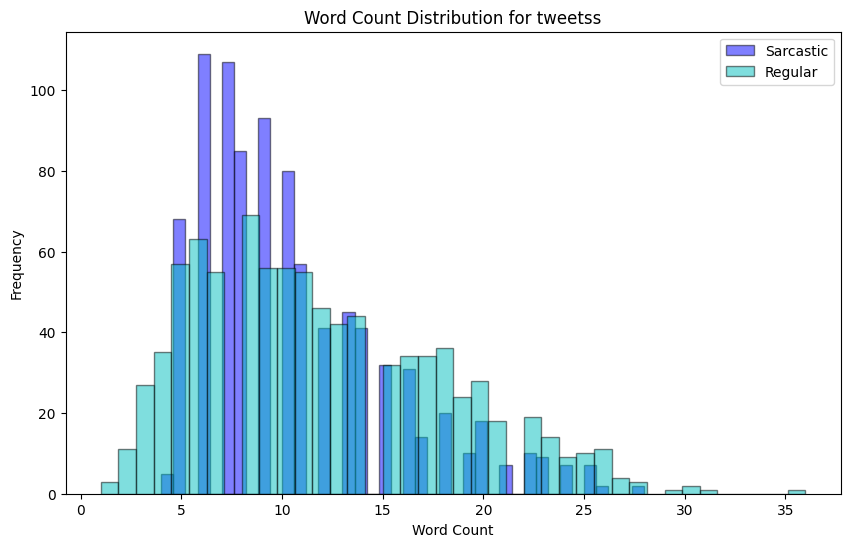

In [16]:
# Plot histogram for sarcastic comments
plt.figure(figsize=(10,6))
plt.hist(sarcastic_tweets['word_count'], bins=40, color='b', alpha=0.5, label='Sarcastic', edgecolor='black')

# Plot histogram for non-sarcastic comments
plt.hist(regular_tweets['word_count'], bins=40, color='c', alpha=0.5, label='Regular', edgecolor='black')

plt.title('Word Count Distribution for tweetss')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [17]:
# sarcastic_tweets
sarcastic_tweets.describe()

,label,word_count
count,900.0,900.000000
mean,1.0,10.563333
std,0.0,4.766330
min,1.0,4.000000
25%,1.0,7.000000
50%,1.0,9.000000
75%,1.0,13.000000
max,1.0,28.000000


In [18]:
# regular_tweets
regular_tweets.describe()

,label,word_count
count,900.0,900.000000
mean,0.0,11.903333
std,0.0,6.159232
min,0.0,1.000000
25%,0.0,7.000000
50%,0.0,11.000000
75%,0.0,16.000000
max,0.0,36.000000


## Mode Wordcount

In [19]:
# Mode for word count of sarcastic comments
mode_sarcastic = sarcastic_tweets['word_count'].mode()[0]

# Mode for word count of non-sarcastic comments
mode_regular = regular_tweets['word_count'].mode()[0]

print(f"The mode of the word count for sarcastic tweets is: {mode_sarcastic}")
print(f"The mode of the word count for regular tweets is: {mode_regular}")

The mode of the word count for sarcastic tweets is: 6
The mode of the word count for regular tweets is: 8


# Creating a Word Cloud

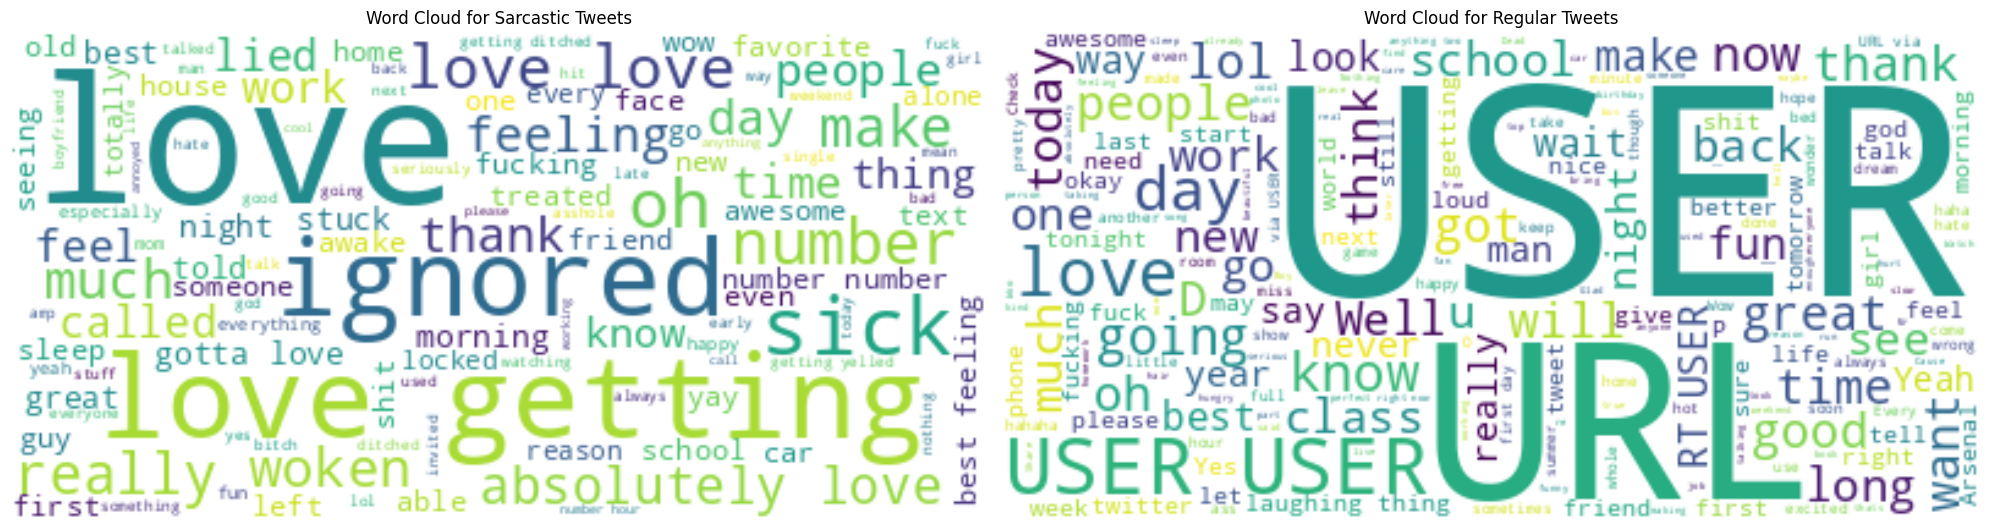

In [21]:
# Combine all sarcastic comments into one large text
text_sarcastic = " ".join(comment for comment in sarcastic_tweets.Tweet)

# Combine all non-sarcastic comments into one large text
text_regular = " ".join(comment for comment in regular_tweets.Tweet)

# Generate the word clouds
wordcloud_sarcastic = WordCloud(background_color="white").generate(text_sarcastic)
wordcloud_non_sarcastic = WordCloud(background_color="white").generate(text_regular)

# Display the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Tweets')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Regular Tweets')
plt.axis("off")

plt.tight_layout()
plt.show()

In [23]:
# Finding the Top10 common and least common terms
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess and tokenize text
def process_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Process text and find most common and least common words
def analyze_comments(comments):
    words = process_text(" ".join(comments))
    counter = Counter(words)
    most_common = pd.DataFrame(counter.most_common(10), columns=['word', 'frequency'])
    least_common = pd.DataFrame(counter.most_common()[:-11:-1], columns=['word', 'frequency'])
    return most_common, least_common

most_common_sarcastic, least_common_sarcastic = analyze_comments(sarcastic_tweets['Tweet'])
most_common_regular, least_common_regular = analyze_comments(regular_tweets['Tweet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
print("Most common words in sarcastic tweets:")
most_common_sarcastic

Most common words in sarcastic tweets:


,word,frequency
0,love,957
1,getting,187
2,ignored,158
3,number,87
4,sick,75
5,oh,50
6,like,46
7,feeling,40
8,dont,39
9,really,34


In [26]:
print("Least common words in sarcastic tweets:")
least_common_sarcastic

Least common words in sarcastic tweets:


,word,frequency
0,imdying,1
1,neverr,1
2,bites,1
3,mosquito,1
4,condoms,1
5,nobody,1
6,unlimited,1
7,nobueno,1
8,throathurts,1
9,drinking,1


In [27]:
print("Most common words in regular tweets:")
most_common_regular

Most common words in regular tweets:


,word,frequency
0,user,398
1,url,121
2,love,55
3,day,41
4,im,40
5,like,39
6,know,35
7,get,35
8,going,33
9,dont,32


In [28]:
print("Least common words in regular tweets:")
least_common_regular

Least common words in regular tweets:


,word,frequency
0,holidays,1
1,amim,1
2,fuci,1
3,derps,1
4,converse,1
5,knew,1
6,contemplating,1
7,dare,1
8,dandy,1
9,besst,1


## N-gram Analysis

In [31]:
# Process text and find most common n-grams
def analyze_comments(comments, ngram_range=(1, 3)):
    words = process_text(" ".join(comments))

    results = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        ngram_counts = Counter(ngrams(words, n))
        most_common = pd.DataFrame(ngram_counts.most_common(10), columns=['ngram', 'frequency'])
        results.append(most_common)

    return results

unigrams_sarcastic, bigrams_sarcastic, trigrams_sarcastic = analyze_comments(sarcastic_tweets['Tweet'])
unigrams_regular, bigrams_regular, trigrams_regular = analyze_comments(regular_tweets['Tweet'])

In [32]:
print("\nMost common bigrams in sarcastic tweets:")
bigrams_sarcastic


Most common bigrams in sarcastic tweets:


,ngram,frequency
0,"(love, getting)",180
1,"(love, ignored)",139
2,"(love, sick)",62
3,"(love, love)",43
4,"(oh, love)",35
5,"(absolutely, love)",32
6,"(love, woken)",24
7,"(really, love)",22
8,"(love, feeling)",21
9,"(dont, love)",21


In [33]:
print("\nMost common trigrams in sarcastic tweets:")
trigrams_sarcastic


Most common trigrams in sarcastic tweets:


,ngram,frequency
0,"(love, love, love)",21
1,"(got, ta, love)",19
2,"(love, getting, ignored)",12
3,"(love, ignored, love)",11
4,"(best, feeling, ever)",11
5,"(love, getting, sick)",11
6,"(absolutely, love, getting)",10
7,"(love, treated, like)",10
8,"(oh, love, getting)",10
9,"(love, ignored, best)",10


In [34]:
print("\nMost common bigrams in regular tweets:")
bigrams_regular


Most common bigrams in regular tweets:


,ngram,frequency
0,"(user, user)",78
1,"(url, user)",23
2,"(rt, user)",13
3,"(via, user)",9
4,"(user, url)",9
5,"(url, via)",8
6,"(laughing, loud)",7
7,"(first, day)",7
8,"(cant, wait)",7
9,"(user, thanks)",6


In [35]:
print("\nMost common trigrams in regular tweets:")
trigrams_regular


Most common trigrams in regular tweets:


,ngram,frequency
0,"(user, user, user)",35
1,"(url, via, user)",8
2,"(user, url, user)",5
3,"(url, user, user)",4
4,"(rt, user, user)",3
5,"(first, day, school)",3
6,"(url, im, going)",2
7,"(via, user, user)",2
8,"(didnt, think, going)",2
9,"(user, user, url)",2
